# MSDS 7331 Data Mining Lab 2
Professor: Dr. Jake Drew  
Team: Steven Hayden, Josephine MacDaniel, Korey MacVittie, Afreen Siddiqui, Eduardo Cantu

In [1]:
#load Libraries
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
import matplotlib as mp1
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

<a id='DocIndex'></a>
### [Data Preparation 1](#DataPrep1)
### [Data Preparation 2](#DataPrep2)
### [On-Time Evaluation Model](#OnTimeModel)
* [Data Split](#DataSplit)
* [Logistic Regression](#LogRegMod)
* [Decision Tree](#TreeMod)
* [K-Nearest Neighbors](#KNNMod)
* [Model Comparison for On-Time Variable](#OnTimeComp)    

### [Multi-Fatality Accidents](#MultiFatality)

<a id='DataPrep1'></a>
### Data Preparation Part 1
**[Return](#DocIndex)**

#### data preperation for model 1 & 2

In [ ]:
#Load Data
Accident_df_2016 = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2016.csv',low_memory=False)
Accident_df_2015 = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2015.csv',low_memory=False)
Accident_df = pd.concat([Accident_df_2015,Accident_df_2016])


#Load Damage Data
Distract_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/distract.csv',low_memory=False)
Damage_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/damage.csv',low_memory=False)

#Merge the distract data and damage data
Accident_df = Accident_df.merge(Distract_df,left_on = 'consecutive_number', right_on = 'consecutive_number', how= 'left')
Accident_df = Accident_df.merge(Damage_df,left_on = 'consecutive_number', right_on = 'consecutive_number', how= 'left')


## Data Meaning Type
In this section, we will go over the attributes in our data set, and explain each. These descriptions are taken from the kaggle site for this data, found [here](https://www.kaggle.com/usdot/nhtsa-traffic-fatalities).

There are quite a few variables here - however, many of them are redundant with each other. As should not be surprising when governmental bureaucracy is involved, there are a variety of variables here that are "encoded" and redundant with one another. Much of the information relates to the location of the accident: latitude, longitude, type of roadway, nearest mile marker, type of intersection, and so forth.

| Variable Name | Data Type | Description |
| :- | :- | :- |
| state_number | Interval | Identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| state_name | Nominal | Identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| consecutive_number | Interval | Unique case number assigned to each crash. It appears on each data file and is used to merge information from the data files together. xxxxxx Two Characters for State Code followed by Four Characters for Case Number. |
| number_of_vehicle_forms_submitted_all | Interval | Count of the total number of vehicles involved. |
| number_of_motor_vehicles_in_transport_mvit | Interval | Count of the number of vehicles in-transport involved in the crash. Legally parked vehicles are not included. |
| number_of_parked_working_vehicles | Interval | Count of the number of parked and working vehicles involved in the crash. |
| number_of_forms_submitted_for_persons_not_in_motor_vehicles | Interval | Number of Person Forms (Not a Motor Vehicle Occupant) that are applicable to this case (i.e., non-occupants). |
| number_of_persons_not_in_motor_vehicles_in_transport_mvit | Interval | Count of the number of non-motorists in the crash. A non-motorist is defined as a pedestrian, a cyclist, an occupant of a motor vehicle not intransport, a person riding a horse, an occupant of an animal drawn conveyance, person associated with non-motorist conveyance (e.g., baby carriage, skate board, wheelchair), or an other non-motorist (e.g., person outside a trafficway, person in a house). |
| number_of_persons_in_motor_vehicles_in_transport_mvit | Interval | Count of the number of motorists in the crash. A motorist is a driver, passenger or unknown occupant type of a motor vehicle in-transport. |
| number_of_forms_submitted_for_persons_in_motor_vehicles | Interval | Count of the number of Person Level (Motor Vehicle Occupant) Forms that are applicable to this case (i.e., occupants). |
| county | Nominal | Records the location of the unstabilized event with regard to the County. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| city | Nominal | Records the location of the unstabilized event with regard to the City. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). |
| day_of_crash | Ordinal | Records the day of the month on which the crash occurred. |
| month_of_crash | Ordinal | Records the month in which the crash occurred. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| year_of_crash | Ordinal | Records the year in which the crash occurred. |
| day_of_week | Ordinal | Records the day of the week on which the crash occurred. Sunday is Day 1. |
| hour_of_crash | Ordinal | Records the hour at which the crash occurred. Listed in 24-hour format. |
| minute_of_crash | Ordinal | Records the minutes after the hour at which the crash occurred. |
| national_highway_system | Nominal | Identifies whether this crash occurred on a trafficway that is part of the National Highway System. |
| land_use | Nominal | 1 (Rural), 2 (Urban), 6 (Trafficway Not in State Inventory), 8 (Not Reported) and 9 (Unknown). |
| land_use_name | Nominal | 1 (Rural), 2 (Urban), 6 (Trafficway Not in State Inventory), 8 (Not Reported) and 9 (Unknown). |
| functional_system | Nominal | 01 (Interstate), 02 (Principal Arterial – Other Freeways and Expressways), 03 (Principal Arterial – Other), 04 (Minor Arterial), 05 (Major Collector), 06 (Minor Collector), 07 (Local), 96 (Trafficway Not in State Inventory), 98 (Not Reported), and 99 (Unknown). |
| functional_system_name | Nominal | 01 (Interstate), 02 (Principal Arterial – Other Freeways and Expressways), 03 (Principal Arterial – Other), 04 (Minor Arterial), 05 (Major Collector), 06 (Minor Collector), 07 (Local), 96 (Trafficway Not in State Inventory), 98 (Not Reported), and 99 (Unknown). |
| ownership | Nominal | For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| ownership_name | Nominal | For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| route_signing | Nominal | Identifies the route signing of the trafficway on which the crash occurred, using a coding system. |
| route_signing_name | Nominal | Identifies the route signing of the trafficway on which the crash occurred. |
| trafficway_identifier | Nominal | Records the trafficway on which the crash occurred. |
| trafficway_identifier_2 | Nominal | Records the trafficway on which the crash occurred. |
| milepoint | Interval | Records the milepoint nearest to the location where the crash occurred, if applicable.
| latitude | Interval | Identifies the location of the crash using Global Position coordinates. This is the position of latitude. |
| longitude | Interval | Identifies the location of the crash using Global Position coordinates. |
| special_jurisdiction | Nominal | Identifies if the location on the trafficway where the crash occurred qualifies as a Special Jurisdiction even though it may be patrolled by state, county or local police (e.g., all State highways running through Indian reservations are under the jurisdiction of the Indian reservation). |
| special_jurisdiction_name | Nominal | Identifies if the location on the trafficway where the crash occurred qualifies as a Special Jurisdiction even though it may be patrolled by state, county or local police (e.g., all State highways running through Indian reservations are under the jurisdiction of the Indian reservation). |
| first_harmful_event | Nominal | Describes the first injury or damage producing event of the crash. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| first_harmful_event_name | Nominal | Describes the first injury or damage producing event of the crash. |
| manner_of_collision | Nominal | Describes the orientation of two motor vehicles in-transport when they are involved in the “First Harmful Event” of a collision crash. If the “First Harmful Event” is not a collision between two motor vehicles in-transport it is classified as such. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| manner_of_collision_name | Nominal | Describes the orientation of two motor vehicles in-transport when they are involved in the “First Harmful Event” of a collision crash. If the “First Harmful Event” is not a collision between two motor vehicles in-transport it is classified as such. |
| relation_to_junction_within_interchange_area | Nominal | Identifies the crash's location with respect to presence in an interchange area. The coding of this data element is done in two sub-fields (see also C20B) and is based on the location of the “First Harmful Event” of the crash. (0) No (1) Yes (8) Not Reported (9) Unknown |
| relation_to_junction_specific_location | Nominal | Identifies the crash's location with respect to presence in or proximity to components typically in junction or interchange areas. The coding of this data element is done in two sub-fields (see also C20A) and is based on the location of the “First Harmful Event” of the crash. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| relation_to_junction_specific_location_name | Nominal | Identifies the crash's location with respect to presence in or proximity to components typically in junction or interchange areas. The coding of this data element is done in two sub-fields (see also C20A) and is based on the location of the “First Harmful Event” of the crash. |
| type_of_intersection | Nominal | Identifies and allows separation of various intersection types. (1) Not an Intersection (2) Four-Way Intersection (3) T-Intersection (4) Y-Intersection (5) Traffic Circle (6) Roundabout (7) Five-Point, or More (10) L-Intersection (98) Not Reported (99) Unknown |
| work_zone | Nominal | Identifies a motor vehicle traffic crash in which the first harmful event occurs within the boundaries of a work zone or on an approach to or exit from a work zone, resulting from an activity, behavior, or control related to the movement of the traffic units through the work zone. (0) None (1) Construction (2) Maintenance -- Construction or Maintenance (3) Utility (4) Work Zone, Type Unknown (--) Not Reported |
| relation_to_trafficway | Nominal | Identifies the location of the crash as it relates to its position within or outside the trafficway based on the “First Harmful Event.” For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| relation_to_trafficway_name | Nominal | Identifies the location of the crash as it relates to its position within or outside the trafficway based on the “First Harmful Event.” |
| light_condition | Nominal | Records the type/level of light that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| light_condition_name | Nominal | Records the type/level of light that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions_1 | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_1_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions_2 | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_2_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| atmospheric_conditions | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| atmospheric_conditions_name | Nominal | Records the prevailing atmospheric conditions that existed at the time of the crash as indicated in the case material. |
| school_bus_related | Nominal | Identifies if a school bus, or motor vehicle functioning as a school bus, is related to the crash. (0) No (1) Yes (--) Not Reported |
| rail_grade_crossing_identifier | Nominal | Identifies if the crash occurred in or near a rail grade crossing. |
| hour_of_notification | Interval | Records the hour that emergency medical service was notified, in 24-hour format. |
| minute_of_notification | Interval | Records the minutes after the hour that emergency medical service was notified. |
| hour_of_arrival_at_scene | Interval | Records the hour that emergency medical service arrived on the crash scene, in 24-hour format. |
| minute_of_arrival_at_scene | Interval | Records the minutes after the hour that emergency medical service arrived on the crash scene. |
| hour_of_ems_arrival_at_hospital | Interval | Records the hour that emergency medical service arrived at the treatment facility to which it was transporting victims of the crash, in 24-hour format. |
| minute_of_ems_arrival_at_hospital | Interval | Records the minutes after the hour that emergency medical service arrived at the treatment facility to which it was transporting victims of the crash. |
| related_factors_crash_level_1 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_1_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| related_factors_crash_level_2 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_2_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| related_factors_crash_level_3 | Nominal | Records factors related to the crash expressed by the investigating officer. For more info on the codes, please look at section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315 |
| related_factors_crash_level_3_name | Nominal | Records factors related to the crash expressed by the investigating officer. |
| number_of_fatalities | Interval | Records the number of fatally injured persons in the crash. |
| number_of_drunk_drivers | Interval | Records the number of drunk drivers involved in the crash. |
| timestamp_of_crash | Nominal | This data element records the date and time on which the crash occurred. |
| Clock points | Nominal | Records the count of damage points on the side of the vehicles. |
| No Damage | Nominal | Records the count of vehicles with no damage. |
| Top | Nominal | Records the count of vehicles with damage on the roof. |
| Undercarriage | Nominal | Records the count of vehicles with damage on the undercarriage. |
| Unknown | Nominal | Records the count of vehicles with unknow damage on. |
| By a Moving Object in Vehicle | Nominal | Count of drivers that were distracted by a moving object in the vehicle. |
| By Other Occupant(s) | Nominal | Count of drivers that were distracted by other occupant(s). |
| Careless/Inattentive | Nominal | Count of drivers that were careless or inattentive. |
| Distracted by Outside Person, Object or Event | Nominal | Count of drivers that were distracted by outside Person, Object or Event |
| Distraction (Distracted), Details Unknown | Nominal | Count of drivers that were distracted by a unknown reason. |
| Distraction/Inattention | Nominal | Count of drivers that were inattentive. |
| Eating or Drinking | Nominal | Count of drivers that were eating or drinking. |
| Inattention (Inattentive), Details Unknown | Nominal | count of drivers that were inattentive with unkown details. |
| Looked But Did Not See | Nominal | Count of drivers that looked but did not see. |
| Lost In Thought/Day Dreaming | Nominal | Count of drivers that lost in thought/day dreaming. |
| No Driver Present/Unknown if Driver Present | Nominal | Count of vehicles unknows if driver was present. |
| Not Distracted | Nominal | Count of drivers that were not distracted. |
| Not Reported | Nominal | Count of vehicles that did not have a distraction reported. |
| Other Cellular Phone Related | Nominal | Count of drivers that were distracted related to a cell phone. |
| Other Distraction | Nominal | Count of drivers that were distracted due to other circumstances. |
| Smoking Related | Nominal | Count of drivers that were distracted due to smoking. |
| Unknown if Distracted | Nominal | Count of drivers that were unknow if they were distracted. |
| While Adjusting Audio or Climate Controls | Nominal | Count of drivers that were distracted adjusting audio or climate controls. |
| While Manipulating Cellular Phone | Nominal | Count of drivers that were distracted manipulating a cell phone. |
| While Talking or Listening to Cellular Phone | Nominal | Count of drivers that were distracted due Talking/Listening to a cell phone. |
| While Using or Reaching For Device/Object Brought Into Vehicle | Nominal | Count of drivers that were distracted due to using or reaching for device/object. |
| While Using Other Component/Controls Integral to Vehicle | Nominal | Count of drivers that were distracted due to using other component/controls integral to vehicle. |

In [3]:
# Displays the record count of non-null Values per attribute and their data type. 
Accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66978 entries, 0 to 66977
Data columns (total 99 columns):
Unnamed: 0                                                        66978 non-null int64
state_number                                                      66978 non-null int64
state_name                                                        66978 non-null object
consecutive_number                                                66978 non-null int64
number_of_vehicle_forms_submitted_all                             66978 non-null int64
number_of_motor_vehicles_in_transport_mvit                        66978 non-null int64
number_of_parked_working_vehicles                                 66978 non-null int64
number_of_forms_submitted_for_persons_not_in_motor_vehicles       66978 non-null int64
number_of_persons_not_in_motor_vehicles_in_transport_mvit         66978 non-null int64
number_of_persons_in_motor_vehicles_in_transport_mvit             66978 non-null int64
number_of_forms_subm

**Duplicate Removal**

In [4]:
#Print shape before duplicate removal
print("Data Shape before duplicate Removal:", Accident_df.shape)

Data Shape before duplicate Removal: (66978, 99)


In [5]:
#check for duplicate records. It displays the maximum count of a duplicated record. 
#Any value greater than 1 would mean that the data has duplicates
Accident_df['consecutive_number'].value_counts().max()

2

In [6]:
#Drop duplicate records and keeps the most recent record. We assume the most resent is the most accurate 
Accident_df = Accident_df.drop_duplicates(['consecutive_number'],keep = 'last')

#check for duplicate records. It displays the maximum count of a duplicated record . 
#Any value greater than 1 would mean that the data has duplicates
Accident_df['consecutive_number'].value_counts().max()

1

In [7]:
#Print shape After duplicate removal
print("Data Shape After duplicate Removal:", Accident_df.shape)

Data Shape After duplicate Removal: (35379, 99)


In [8]:
#Displays all the available attributes on the dataset
Accident_df=Accident_df.reset_index()
Accident_df.count()

index                                                             35379
Unnamed: 0                                                        35379
state_number                                                      35379
state_name                                                        35379
consecutive_number                                                35379
number_of_vehicle_forms_submitted_all                             35379
number_of_motor_vehicles_in_transport_mvit                        35379
number_of_parked_working_vehicles                                 35379
number_of_forms_submitted_for_persons_not_in_motor_vehicles       35379
number_of_persons_not_in_motor_vehicles_in_transport_mvit         35379
number_of_persons_in_motor_vehicles_in_transport_mvit             35379
number_of_forms_submitted_for_persons_in_motor_vehicles           35379
county                                                            35379
city                                                            

#### Data Type Colunm Count
This will look into the number of attributes per variable type

In [9]:
# Take a look a at the data type on the Merged Data
dtype_df=Accident_df.dtypes.reset_index()
dtype_df.columns=["Count","ColumnType"]
dtype_df.groupby("ColumnType").aggregate('count').reset_index()

,ColumnType,Count
0,int64,45
1,float64,30
2,object,25


#### Description of the Categorical Variables

In [10]:
# Describe the Categorical Objects
list_include = ['object']
Accident_df.describe(include=list_include).T

,count,unique,top,freq
state_name,35379,51,Texas,3495
land_use_name,35379,5,Rural,17181
functional_system_name,35379,10,Principal Arterial – Other,10396
ownership_name,35379,25,State Highway Agency,18486
route_signing_name,35379,9,State Highway,10498
trafficway_identifier,35379,16928,I-10,312
trafficway_identifier_2,9432,8138,MAIN ST,26
special_jurisdiction_name,35379,7,No Special Jurisdiction (Includes National For...,34974
first_harmful_event_name,35379,51,Motor Vehicle in Transport,13432
manner_of_collision_name,35379,11,Not Collision with Motor Vehicle in Transport ...,21900


In [ ]:
#Frequency Histograms for the unbalanced attributes
#for col in ['school_bus_related','special_jurisdiction_name','special_jurisdiction_name','relation_to_junction_within_interchange_area',
#           'work_zone','atmospheric_conditions_2_name','rail_grade_crossing_identifier','related_factors_crash_level_1_name','related_factors_crash_level_2_name',
#           'related_factors_crash_level_3_name']:

from matplotlib.ticker import NullFormatter  # useful for `logit` scale
list_include = ['object']
i=1
for col in Accident_df.select_dtypes(include=list_include).columns:
    if col not in ['trafficway_identifier','trafficway_identifier_2','timestamp_of_crash']:
        if i<=3:
            #plt.figure(figsize=(10,4))
            plt.subplot(1,3,i)
            plt.hist(Accident_df[col], bins=len(Accident_df[col].unique()))
            plt.title(col,size=7.8)
            plt.xlabel('Class', size=5)
            plt.ylabel('Class frequency', size=7)
            plt.xticks(rotation='vertical', size=4)
            plt.yticks(size=7)
            i=i+1
        else:
            plt.subplots_adjust(top=.7, bottom=0.4, left=0.01, right=1.1, hspace=0.25, wspace=2)
            plt.show()
            i = 1

plt.subplots_adjust(top=.7, bottom=0.4, left=0.01, right=1.1, hspace=0.25, wspace=2)
plt.show()



There are attritbutes that show extreme imbalance in the dataset. These attributes do not add value to the prediction since most the values are the same. Also, when doing cross validation there is a high probaility that the test set only chooses the highest class.

**Imbalance Attributes:**  
* school_bus_related  
* special_jurisdiction_name
* relation_to_junction_within_interchange_area
* work_zone
* atmospheric_conditions_1_name
* atmospheric_conditions_2_name
* rail_grade_crossing_identifier
* related_factors_crash_level_1_name
* related_factors_crash_level_2_name
* related_factors_crash_level_3_name
* trafficway_identifier
* trafficway_identifier_2


##### Class analysis
 This will look into the classes per attribute

In [ ]:
#Class analysis
list_include = ['object']
unique_values_dict = {}
for col in Accident_df.columns:
    if col in Accident_df.select_dtypes(include=list_include).columns:
        unique_value = str(Accident_df[col].unique())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

#### Description of the Float Variables

In [ ]:
# Describe the Float Objects
list_include = ['float64']
Accident_df.describe(include=list_include).T

In [ ]:
# Verify all float values
list_include = ['float64']
i=1
for col in Accident_df.select_dtypes(include=list_include).columns:
    if i<=3:
        #plt.figure(figsize=(10,4))
        plt.subplot(1,3,i)
        plt.scatter(range(Accident_df.shape[0]),np.sort(Accident_df[col].values))
        plt.xlabel('Index', size=5)
        plt.title(col, size=7)
        plt.ylabel('Class frequency', size=7)
        plt.xticks(size=7)
        i = i + 1
    else:
        plt.subplots_adjust(top=.7, bottom=0.4, left=0.01, right=1.1, hspace=0.25, wspace=2)
        plt.show()
        i = 1
plt.subplots_adjust(top=.7, bottom=0.4, left=0.01, right=1.1, hspace=0.25, wspace=2)
plt.show()        

**Binary classes in Float:**
* By a Moving Object in Vehicle
* By Other Occupant(s)	
* Careless/Inattentive
* Distraction/Careless
* Eating or Drinking
* Lost In Thought/Day Dreaming
* Smoking Related
* While Adjusting Audio or Climate Controls
* While Manipulating Cellular Phone
* While Talking or Listening to Cellular Phone
* While Using or Reaching For Device/Object Brought Into Vehicle
* While Using Other Component/Controls Integral to Vehicle

**Float Classes that can be integers**
* Distracted by Outside Person, Object or Event
* Distraction (Distracted), Details Unknown
* Distraction/Inattention
* Inattention (Inattentive), Details Unknown
* Looked But Did Not See 
* No Driver Present/Unknown if Driver Present
* Not Distracted
* Not Reported
* Other Cellular Phone Related
* Other Distraction
* Unknown if Distracted	
* Clock points
* No Damage
* Top
* Undercarriage
* Unknown

The only true float class is the **Fatalities_ratio, latitude, and longitude**, all other classes can be converted to integer.

#### Missing Values Per Column

In [ ]:
# Missing Values
missing_df=Accident_df.isnull().sum(axis=0).reset_index()
missing_df.columns=['ColumnName','MissingCount']
missing_df=missing_df.ix[missing_df['MissingCount']>0]
missing_df=missing_df.sort_values(by='MissingCount')

missing_df = missing_df.merge(dtype_df,left_on = 'ColumnName', right_on = 'Count', how= 'left')
missing_df

In [ ]:
list_include = ['float64']
# Add a 99 to all float missing values. 99 would mean that it was NA before. This has to be done in order to change the data type to integer.
# There is still a need to know what to do with these observations.
for col in Accident_df.select_dtypes(include=list_include).columns:
    if col not in ['Fatalities_ratio']:
        Accident_df[col].fillna(value=99, inplace=True)

Review Missing Values after adding value '99' to all the missing values in the above attributes. As expected only the Traffic_indentifier_2 still show 12,111 null values. Therefore, this attribute would be removed.

In [ ]:
# Review missing Values Again.
# Missing Values
missing_df=Accident_df.isnull().sum(axis=0).reset_index()
missing_df.columns=['ColumnName','MissingCount']
missing_df=missing_df.ix[missing_df['MissingCount']>0]
missing_df=missing_df.sort_values(by='MissingCount')

missing_df = missing_df.merge(dtype_df,left_on = 'ColumnName', right_on = 'Count', how= 'left')
missing_df

In [ ]:
list_include = ['float64']
# Convert all floats into integers except for 'Fatalities_ratio'
for col in Accident_df.select_dtypes(include=list_include).columns:
    if col not in ['Fatalities_ratio','latitude','longitude']:
        Accident_df[col] = Accident_df[col].astype(int)


Check for the datatype again.

In [ ]:
# Take a look a at the data type on the Merged Data
dtype_df=Accident_df.dtypes.reset_index()
dtype_df.columns=["Count","ColumnType"]
dtype_df.groupby("ColumnType").aggregate('count').reset_index()

#### Description of the Integer Values

In [ ]:
# Describe the Integer Objects
list_include = ['int64','int32']
Accident_df.describe(include=list_include).T

#### Analysis of the integer unique values. 

In [ ]:
#Integer analysis
list_include = ['int64','int32']
unique_values_dict = {}
for col in Accident_df.columns:
    if col in Accident_df.select_dtypes(include=list_include).columns:
        unique_value = str(np.sort(Accident_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Attributes that do not add any value to predict the paramedict on time response.

* Unnamed: 0
* consecutive_number
* milepoint
* latitude
* longitude
* hour_of_ems_arrival_at_hospital
* minute_of_ems_arrival_at_hospital
* Clock points
* Unknown
* Response_Time

Attributes that have an associated name to its ordinal value. The atribute with the name would be kept.
* atmospheric_conditions
* atmospheric_conditions_1
* atmospheric_conditions_2
* state_number

The majority of the values are null.

* trafficway_identifier_2

In [ ]:
# Store data for Task 2 before any manipulation 
Accident_df_2 = Accident_df.copy()

<a id='DataPrep2'></a>
### Data Preparation Part 2 for Within NFPA standard Models
**[Return](#DocIndex)**

There are many accidents with missing data regarding the crash time and the arrival time of responders. This information is necessary for the dependent variable, and in turn is crucial for our analysis. That is why we decided to drop these records with missing data, instead of imputing the gaps with the mean. The amount of records dropped is about a third of the original data set, but we have sufficient records that this should not prove to be a problem.

In [ ]:
#Remove any recoreds without  time informaiton for arival and crash time
count_no_rec= Accident_df[(Accident_df['hour_of_crash']>24) | (Accident_df['hour_of_arrival_at_scene']>24)]
Accident_df = Accident_df[(Accident_df['hour_of_crash']<=24) & (Accident_df['hour_of_arrival_at_scene']<=24)]
print(count_no_rec.consecutive_number.count(), 'records were removed due to missing time data.') 
print("Data Shape After time record Removal:", Accident_df.shape)

In [ ]:
# Add a new Feature. This is the ratio between the number of fatalities and the people involved in the accident.
Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)

#Converts hour and min to datetime type
#crash
Accident_df.hour_of_crash = pd.to_timedelta(Accident_df.hour_of_crash,unit ='h')
Accident_df.minute_of_crash= pd.to_timedelta(Accident_df.minute_of_crash,unit ='m')
#arrival
Accident_df.hour_of_arrival_at_scene = pd.to_timedelta(Accident_df.hour_of_arrival_at_scene,unit ='h')
Accident_df.minute_of_arrival_at_scene = pd.to_timedelta(Accident_df.minute_of_arrival_at_scene,unit ='m')

#concatenates Hour and Minutes together 
Accident_df['Crash_Time'] = Accident_df['hour_of_crash'] + Accident_df['minute_of_crash'] 
Accident_df['Arrival_Time'] = Accident_df['hour_of_arrival_at_scene'] + Accident_df['minute_of_arrival_at_scene']
#creates a response_time variable from the two fields above and converts to min
Accident_df['Response_Time'] = Accident_df['Arrival_Time'] - Accident_df['Crash_Time']
total_response_time_in_min = pd.DatetimeIndex(Accident_df['Response_Time'])
Accident_df['Response_Time']= total_response_time_in_min.hour * 60 + total_response_time_in_min.minute


#gut check of calculation 
Accident_df[['hour_of_crash','minute_of_crash','Crash_Time','hour_of_arrival_at_scene','minute_of_arrival_at_scene','Arrival_Time','Response_Time']].head()

The National Fire Protection Association (NFPA) has established a standard for response time and procedures for Emergency Medical Services (EMS) to adhere to.

From EMSword.com, "The NFPA 1710 standard is based upon a combination of accepted practices and more than 30 years of study, research, testing and validation. Members of the 1710 committee that developed the standard include representatives from various fire agencies and the International Association of City/County Managers (ICMA)."

The NFPA 1710 standard allows for a one-minute call for evaluation and preparation, and four minutes for the arrival of a unit with first responders. For a situation that requires advanced life support equipment, such as an ambulance, the standard is eight minutes after call preparation.  

We chose to use their standards as a threshold to determine if paramedics got to the scene of the accident "in time." This would be a binary response of "0" for not arriving within 9 minutes of the accident, with "1" representing being within the 9 minutes. 

Source: https://www.emsworld.com/article/10324786/ems-response-time-standards

In [ ]:
#creates the binary variable 'within 9 minutes NFPA standard'
Accident_df['within 9 minutes NFPA standard'] = np.where(Accident_df['Response_Time']<=9,1,0)
#Accident_df[['Response_Time','within 9 minutes NFPA standard']].head(10) # Verify the binary variable

Since the logistic regression will predict if the paramedics arrived to the scene of the accident within the target window, we would select the attributes that we think affect this variable. Generally, we suspect that weather conditions, type of road, and state may play a role.
First we would check what columns are available.

From all the attributes in the dataset, we will select a subset to predict whether or not emergency responders would respond within the target window.

* **state_name:** Due to differences in size and funding, it is possible that the state in which an accident occurs may play a role.
* **route_signing_name:** The type of roadway will probably play a role, as some road types may cover areas that are more distant from dispatch locations.
* **light_condition_name:** The local lighting would certainly seem to be important in determining if responders are able to respond in time: darkness is more dangerous to drive in than light.
* **atmospheric_conditions_name:** Weather conditions will almost certainly play a role.
* **within 9 minutes NFPA standard:** Our response variable. A 1 indicates that emergency services responded within the target window, which is 9 minutes. A 0 indicates that responders arrived outside the target window.

In [ ]:
#Make a copy of the original Data
Accident_for_Model=Accident_df.copy()

# 1. Remove attributes that just arent useful for us
for col in ['Unnamed: 0',
             'state_number',
             'consecutive_number',
             'county',
             'city',
             'day_of_crash',
             'month_of_crash',
             'year_of_crash',
             'day_of_week',
             'hour_of_crash',
             'minute_of_crash',
             'national_highway_system',
             'land_use',
             'land_use_name',
             'functional_system',
             'functional_system_name',
             'ownership',
             'ownership_name',
             'route_signing',
             'trafficway_identifier',
             'trafficway_identifier_2',
             'latitude',
             'longitude',
             'special_jurisdiction',
             'special_jurisdiction_name',
             'first_harmful_event',
             'first_harmful_event_name',
             'manner_of_collision',
             'manner_of_collision_name',
             'relation_to_junction_within_interchange_area',
             'relation_to_junction_specific_location',
             'relation_to_junction_specific_location_name',
             'type_of_intersection',
             'work_zone',
             'relation_to_trafficway',
             'relation_to_trafficway_name',
             'light_condition',
             'atmospheric_conditions_1',
             'atmospheric_conditions_1_name',
             'atmospheric_conditions_2',
             'atmospheric_conditions_2_name',
             'atmospheric_conditions',
             'school_bus_related',
             'rail_grade_crossing_identifier',
             'hour_of_notification',
             'minute_of_notification',
             'hour_of_arrival_at_scene',
             'minute_of_arrival_at_scene',
             'hour_of_ems_arrival_at_hospital',
             'minute_of_ems_arrival_at_hospital',
             'related_factors_crash_level_1',
             'related_factors_crash_level_1_name',
             'related_factors_crash_level_2',
             'related_factors_crash_level_2_name',
             'related_factors_crash_level_3',
             'related_factors_crash_level_3_name',
             'milepoint',
             'number_of_parked_working_vehicles',
             'number_of_forms_submitted_for_persons_not_in_motor_vehicles',
             'number_of_persons_not_in_motor_vehicles_in_transport_mvit',
             'number_of_persons_in_motor_vehicles_in_transport_mvit',
             'number_of_forms_submitted_for_persons_in_motor_vehicles',
             'timestamp_of_crash',
             'number_of_fatalities',
             'number_of_drunk_drivers',
             'Fatalities_ratio',
             'number_of_vehicle_forms_submitted_all',
             'Crash_Time',
             'Arrival_Time',
             'Response_Time',
             'number_of_motor_vehicles_in_transport_mvit',
             'By a Moving Object in Vehicle',
             'By Other Occupant(s)',
             'Careless/Inattentive',
             'Distracted by Outside Person, Object or Event',
             'Distraction (Distracted), Details Unknown',
             'Distraction/Careless',
             'Distraction/Inattention',
             'Eating or Drinking',
             'Inattention (Inattentive), Details Unknown',
             'Looked But Did Not See',
             'Lost In Thought/Day Dreaming',
             'No Driver Present/Unknown if Driver Present',
             'Not Distracted',
             'Not Reported',
             'Other Cellular Phone Related',
             'Other Distraction',
             'Smoking Related',
             'Unknown if Distracted',
             'While Adjusting Audio or Climate Controls',
             'While Manipulating Cellular Phone',
             'While Talking or Listening to Cellular Phone',
             'While Using or Reaching For Device/Object Brought Into Vehicle',
             'While Using Other Component/Controls Integral to Vehicle',
             'Clock points',
             'No Damage',
             'Top',
             'Undercarriage',
             'Unknown',
             'level_0',
             'index']:
                    if col in Accident_for_Model:
                        del Accident_for_Model[col]
# List the columns left in the df
list(Accident_for_Model)


In [ ]:
# Take a look a at the data type on the Merged Data
dtype_df=Accident_for_Model.dtypes.reset_index()
dtype_df.columns=["Count","ColumnType"]
dtype_df.groupby("ColumnType").aggregate('count').reset_index()

Any observation value on the selected attributes that is reported as *Unknown*, *Other*, or *Not Reported* would be removed from the dataset. These values do not bring any value when it comes to predicting the response time of the paramedics, and are effectively a non-value for our purposes.

In [ ]:
# Check for columns that might not be needed
print("Unique values for 'route_signing_name':" , Accident_for_Model.atmospheric_conditions_name.unique(), "\n")
print("Unique values for 'atmospheric_conditions_name':" , Accident_for_Model.atmospheric_conditions_name.unique(), "\n")
print("Unique values for 'light_condition_name':" , Accident_for_Model.light_condition_name.unique())


In [ ]:
# Removes observations with an unknown informaiton in the route, atmospheric conditions and state name
Accident_for_Model= Accident_for_Model[(Accident_for_Model['route_signing_name'] != 'Unknown')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['route_signing_name'] != 'Other')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['atmospheric_conditions_name'] != 'Unknown')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['atmospheric_conditions_name'] != 'Other')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['atmospheric_conditions_name'] != 'Not Reported')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['light_condition_name'] != 'Unknown')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['light_condition_name'] != 'Other')]
Accident_for_Model= Accident_for_Model[(Accident_for_Model['light_condition_name'] != 'Not Reported')]
Accident_for_Model.count()

Here we have confirmed that the undesired observations have been removed from the dataset.

In [ ]:
print("Unique values for 'route_signing_name':" , Accident_for_Model.atmospheric_conditions_name.unique(), "\n")
print("Unique values for 'atmospheric_conditions_name':" , Accident_for_Model.atmospheric_conditions_name.unique(), "\n")
print("Unique values for 'light_condition_name':" , Accident_for_Model.light_condition_name.unique())

In [ ]:
# Rearrange colums
Accident_for_Model=Accident_for_Model[['within 9 minutes NFPA standard','state_name','route_signing_name','atmospheric_conditions_name','light_condition_name']]
list(Accident_for_Model)  # Check for the correct column sequence

The section below will perform a one-hot encoding of the variables on the dataset. This is to prepare the data in such a way that can be use for our logistic regresion.

In [ ]:
# perform one-hot encoding of the categorical data "state_name"
tmp_state_df = pd.get_dummies(Accident_for_Model.state_name,prefix='state')
#tmp_state_df.head(20)

# perform one-hot encoding of the categorical data "route_signing_name"
tmp_route_df = pd.get_dummies(Accident_for_Model.route_signing_name,prefix='route')
#tmp_route_df.head(20)

# perform one-hot encoding of the categorical data "atmospheric_conditions_name"
tmp_atmos_df = pd.get_dummies(Accident_for_Model.atmospheric_conditions_name,prefix='atmos')
#tmp_atmos_df.head(20)

# perform one-hot encoding of the categorical data "atmospheric_conditions_name"
tmp_light_df = pd.get_dummies(Accident_for_Model.light_condition_name, prefix='light')
#tmp_atmos_df.head(20)

Accident_for_Model = pd.concat((Accident_for_Model,tmp_state_df,tmp_route_df,tmp_atmos_df,tmp_light_df), axis=1) # add back into the dataframe
list(Accident_for_Model)
#delete the categorical variable columns
del Accident_for_Model['state_name']
del Accident_for_Model['route_signing_name']
del Accident_for_Model['atmospheric_conditions_name']
del Accident_for_Model['light_condition_name']

#list(Accident_for_Model) # Check for the last colums

<a id='OnTimeModel'></a>
### Modeling and Evaluation 1
**[Return](#DocIndex)**

###### Within NFPA standard Model

We will compare our models based on precision.  We are using precision because we want to penalize false positives more. A high precision is better because this model would be used by emergency operators to communicate that the EMS will arrive within the standard time. You do not want to say they will arrive within the standard and they do not.  This could impact the decision made at the scene of the accident. Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives. A false positive in this scenario is when the EMS does not arrive within the standard time, but it was classified as they did. A true positive is when the EMS is correctly classified as arriving with in the standard time.  

$$ Precision =\frac{True Positives}{True Positives + False Positives}$$

###### Multi-Fatality Accidents Model

F-measure is way to measure false positive and false negatives together. The true negative rate is not that important so there is no cost assigned to it. It is important to identify multi-fatality crashes versus single-fatality crashes because the EMS could respond accordingly and perhaps be more able to prevent deaths in such incidents in the future.  The F-measure is defined as the number of true positives multiplied by two divided by the number of true positives multiplied by two plus the number false negatives and the number of false positives. 

$$F-measure =\frac{2(True Positives)}{2(True Positives) + False Positives + False Negatives }$$

#### Within NFPA standard Model

<a id='DataSplit'></a>
### Data Split and Cross Validation Setup
**[Return](#DocIndex)**  

We will be splitting the dataset  into a Training and Test set for the models. The split is going to be 80 % for training and the other 20 % for testing. The ratio used is accepted split in the research community, and we did not see any reason to deviate from this ratio. A Cross Validation of ten fold would be performed to validate the models. 

* Binary Response: *"within 9 minutes NFPA standard"*

|Value|Description|
|-----|:-----------|
|0| Time of arrival > 9 minutes|
|1| Time of arrival <=9 minutes|

* To ensure that we use the same randomly-selected test and training sets each time we perform the cross-validation, we have specifically set a seed for our random number generator

In [ ]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
OnTime_lr_clf = LogisticRegression(penalty='l2', C=1, class_weight=None) # get object
modelPrecTestResults = pd.DataFrame() # This will store all the Precision results 


Split data set into Train and Test Sets.  
The split uses a stratify strategy, in this way we get the same ratio of on-time and non-on-time on both tests.

In [ ]:
# Code addapted from the Dataming Notbooks. Logistic Regression Notbook 4.
#URL: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
from sklearn.model_selection import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# we want to predict the X and y data as follows:
if 'within 9 minutes NFPA standard' in Accident_for_Model:
    y = Accident_for_Model['within 9 minutes NFPA standard'].values # get the labels we want
    del Accident_for_Model['within 9 minutes NFPA standard'] # get rid of the class label
    X = Accident_for_Model.values # use everything else to predict!

#split Data into Test and Train data
xTrain, Xtest, yTrain, yTest=train_test_split(X,y,test_size=0.20, random_state=0, stratify=y)

#scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(xTrain)
X_train_scaled = scl_obj.transform(xTrain) # apply to training
X_test_scaled = scl_obj.transform(Xtest)

Set the cross validation object

In [ ]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 10  #number of Cross Validation folds
num_instances = len(yTrain)

# Cross Validation Object
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                         random_state=0)
                         
print(xTrain) # This prints all the dependant variables
print(cv_object) # This print the Data split object

The mean of the 10-fold cross validation is indicated above. This value is using the selected parameter values described earlier.

<a id='LogRegMod'></a>

### Logistic Regression using Grid Search
**[Return](#DocIndex)**

On this section we will perform a serch for the best model using *Grid Search*. As per the previous model were the parameter values used to be fixed, in this section a range of parameters is given, and the search algorithm will iterate through all parameter conbinations.

In this search we would go through 64 possible model combinations. From these model combinations, the algorithm will pick the one with the highest accuracy. 

The search parameter matrix will include:
* **Penalty:** L2. This remains fixed, since solver 'sag' only takes L2 penalties.
* **C (Cost):** It will test eight values: (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000)
* **Random State**: It will stay at 0. This is just the random seed. 
* **Solver:** Two modes will be tested under this parameter: 'sag','liblinear'. These are the algorithm for the optimzation problem. The first algorithm is optimized for large datasets, the second is not.

In [ ]:
# Code addapted from the notebook 'ComparingSegregatedHighSchoolCampuses.ipynb' to make a grid search for the best model
#URL:https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Models/2017ComparingSegregatedHighSchoolCampuses.ipynb
parameters = { 'penalty':['l2']
              ,'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', None]
              ,'random_state': [0]
              ,'solver': ['sag','liblinear']
              ,'max_iter':[100,500]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=OnTime_lr_clf
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object # KFolds = 10
                   , scoring='precision')

# Perform the seaarch throught all the parameters in the parameters dictionary
regGridSearch.fit(X_train_scaled, yTrain)

Below is the display for the parameters for the best model.

In [ ]:
#Diplay the top model parameters
print(regGridSearch.best_estimator_)

# Display the Best Score of the iteration search
print('\nThe best precision score from the search is:', regGridSearch.best_score_ )

The Grid Search has obtained optimal parameters from the parameter matrix. These parameters would be stored in the **OntimeClassifierEst**. This object contains the model with the highest precision from the grid search.

Next, the model with the optimal parameters would be used with a cross validation of ten fold. The results of the cross validation would be used to compare the performance of the models.

The main differences betweem the two approachs are:  

|Parameter|Grid Search|
|---------|:---------:|
|class_weight|None|
|Cost (C) | 0.0001 |
|Solver| liblinear|
|Ten Fold Avg Accuracy| 0.695675 |

In [ ]:
from sklearn.model_selection import cross_validate

#Use the best parameters for our Linear Regression object
OntimeLinClassifierEst = regGridSearch.best_estimator_

bestLinScores = cross_validate(OntimeLinClassifierEst,X_train_scaled,yTrain,scoring=['accuracy','precision','recall'], cv=cv_object, return_train_score=True)


# grab the results from the dictionary into a dataframe
cvScoreResult = pd.DataFrame()
cvScoreResult['Accuracy'] = bestLinScores['test_accuracy']
cvScoreResult['Precision'] = bestLinScores['test_precision']
cvScoreResult['Recall'] = bestLinScores['test_recall']
modelPrecTestResults['LinearRegression'] = bestLinScores['test_precision']

print('Cross Validation Fold -- Mean Error Scores')
print(cvScoreResult)

avgAccuracy = bestLinScores['test_accuracy'].mean()
avgPrecision = bestLinScores['test_precision'].mean()
avgRecall = bestLinScores['test_recall'].mean()


avgAccStr = "\nAverage accuracy for all cv folds is: \t {avgAccuracy:.5}"
avgPrcStr = "Average precision for all cv folds is: \t {avgPrecision:.5}"
avgRecStr = "Average recall for all cv folds is: \t {avgRecall:.5}"

print(avgAccStr.format(avgAccuracy=avgAccuracy))
print(avgPrcStr.format(avgPrecision=avgPrecision))
print(avgRecStr.format(avgRecall=avgRecall))
print('*********************************************************')

Now we would try the model using the test data set, to determine the difference. 

In [ ]:
# Using the Grid Search
OntimeLinClassifierEst.fit(X_train_scaled,yTrain)
y_hat_SearchGrid = OntimeLinClassifierEst.predict(X_test_scaled)
y_hat_SearchGrid_score =  OntimeLinClassifierEst.predict_proba(X_test_scaled)
conf_SearchGrid=mt.confusion_matrix(yTest,y_hat_SearchGrid)
acc_SearchGrid = mt.accuracy_score(yTest,y_hat_SearchGrid)
prec_SearchGrid = mt.precision_score(yTest,y_hat_SearchGrid)


print ("Precision with Seach Grid Parameters:", prec_SearchGrid)
print ("Confusion matrix for Logistic Regression with Grid Seach Parameters")
print(pd.DataFrame(mt.confusion_matrix(yTest,y_hat_SearchGrid),
             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

The logistic regression model applied on the test data is 0.0176 worst. This tells us that the new test data is very close to the training data, and that the model is consistent for the test data. Also, the precision value for the test data is suggesting that the model when predicting that the paramedics are on time, they have a 67% chance they will.

<a id='TreeMod'></a>
### Tree Ensemble Comparisons setup

**[Return](#DocIndex)**

In [ ]:
# Already on a cell above this cell can be removed

# Code to run through the cross validation loop and set the training and testing variable for one single iteration 
#Code addapted from the Dataming Notbooks. Logistic Regression and SVM Notbook 4
#URL: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
#from sklearn.preprocessing import StandardScaler
#for train_indices, test_indices in cv_object.split(X,y): 
    
#    X_train = X[train_indices]
#    y_train = y[train_indices]
    
#    X_test = X[test_indices]
#    y_test = y[test_indices]
#    xTrain, yTrain
#scale attributes by the training set
#scl_obj = StandardScaler()
#scl_obj.fit(X_train)
#X_train_scaled = scl_obj.transform(X_train) # apply to training
#X_test_scaled = scl_obj.transform(X_test)

In [276]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix





num_estimators = 50
# lets train some trees
clf_array = [
    #('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(n_jobs=-1)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators=num_estimators,min_samples_split=2)),
    ('Boosted Tree',       GradientBoostingClassifier(n_estimators=num_estimators)) #takes a long time
    ]

#param for classifier   
param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20],
    'random_state':[0]
}


# Define Dictionary for best Tree Classifier
bestTreeClass={}
bestTreeClassScore={}    
for clf in clf_array: 
    print("Grid Search for :", clf[0])
    grid_search = GridSearchCV(clf[1], param_grid, scoring='precision', refit='precision_score',
                       cv=cv_object, return_train_score=True, n_jobs=8,verbose=1)
    grid_search.fit(X_train_scaled, yTrain)
    OntimeTreeClassifierEst = grid_search.best_estimator_
    y_hat = OntimeTreeClassifierEst.predict(X_test_scaled)
    bestTreeClass[clf[0]]=grid_search.best_estimator_
    bestTreeClassScore[clf[0]]=grid_search.best_score_
    
    print('Best params for {}'.format('precision_score'))
    print(grid_search.best_params_)
    print('\nThe best precision score from the search is:', grid_search.best_score_ )
        # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format('precision_score'))
    print(pd.DataFrame(confusion_matrix(yTest, y_hat),
             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    
    print("{} Precision Score for the Test Data".format(clf[0]) ,mt.precision_score(yTest, y_hat), "\n")
    print("--------------------------------------------------------------------\n")

Grid Search for : Random Trees
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    2.2s finished


Best params for precision_score
{'max_depth': 3, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 10, 'random_state': 0}

The best precision score from the search is: 0.6432149363828895

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg      1458       173
pos      1017       294
Random Trees Precision Score for the Test Data 0.6295503211991434 

--------------------------------------------------------------------

Grid Search for : Extra Random Trees
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    1.5s remaining:    0.9s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    1.9s finished


Best params for precision_score
{'max_depth': 3, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 10, 'random_state': 0}

The best precision score from the search is: 0.6720749225447146

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg      1571        60
pos      1164       147
Extra Random Trees Precision Score for the Test Data 0.7101449275362319 

--------------------------------------------------------------------

Grid Search for : Boosted Tree
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    1.7s remaining:    1.1s


Best params for precision_score
{'max_depth': 3, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 10, 'random_state': 0}

The best precision score from the search is: 0.7426124428564955

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg      1610        21
pos      1245        66
Boosted Tree Precision Score for the Test Data 0.7586206896551724 

--------------------------------------------------------------------

Wall time: 7.32 s


[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    2.0s finished


In [277]:
# Select the best tree classifier from the GridSerach output
OntimeTreeClassifierEst=bestTreeClass['Boosted Tree']

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [278]:
#Use the best parameters for our Tree Class object


bestScores = cross_validate(OntimeTreeClassifierEst,X_train_scaled,yTrain,scoring=['accuracy','precision','recall'], cv=cv_object, return_train_score=True)


# grab the results from the dictionary into a dataframe
cvScoreResult = pd.DataFrame()
cvScoreResult['Accuracy'] = bestScores['test_accuracy']
cvScoreResult['Precision'] = bestScores['test_precision']
cvScoreResult['Recall'] = bestScores['test_recall']
modelPrecTestResults['TreeModel'] = bestScores['test_precision']

print('Cross Validation Fold -- Mean Error Scores')
print(cvScoreResult)

avgAccuracy = bestScores['test_accuracy'].mean()
avgPrecision = bestScores['test_precision'].mean()
avgRecall = bestScores['test_recall'].mean()


avgAccStr = "\nAverage accuracy for all cv folds is: \t {avgAccuracy:.5}"
avgPrcStr = "Average precision for all cv folds is: \t {avgPrecision:.5}"
avgRecStr = "Average recall for all cv folds is: \t {avgRecall:.5}"

print(avgAccStr.format(avgAccuracy=avgAccuracy))
print(avgPrcStr.format(avgPrecision=avgPrecision))
print(avgRecStr.format(avgRecall=avgRecall))
print('*********************************************************')

Cross Validation Fold -- Mean Error Scores
   Accuracy  Precision    Recall
0  0.562261   0.705882  0.045369
1  0.587335   0.732558  0.062315
2  0.572036   0.718310  0.049133
3  0.577136   0.753425  0.053295
4  0.568211   0.741176  0.059603
5  0.587335   0.790698  0.066601
6  0.569911   0.736842  0.066225
7  0.581385   0.724138  0.061523
8  0.582235   0.826667  0.060078
9  0.558436   0.696429  0.036758

Average accuracy for all cv folds is: 	 0.57463
Average precision for all cv folds is: 	 0.74261
Average recall for all cv folds is: 	 0.05609
*********************************************************


In [300]:
OntimeTreeClassifierEst.fit(X_train_scaled,yTrain)
featureImpDf=pd.DataFrame()
featureImpDf['Attribute']=Accident_for_Model.columns
featureImpDf['Importance']=OntimeTreeClassifierEst.feature_importances_


<a id='KNNMod'></a>
### K-Nearest Neighbors
**[Return](#DocIndex)**

In [254]:
#Training and predictions: 
#source: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  #Initialize the value for K
classifier.fit(X_train_scaled, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [255]:
#param for classifier   
KNNclassifier = KNeighborsClassifier() 
param_grid = {
    'n_neighbors': [1, 2, 5, 10], 
    #'random_state':[0]
}

grid_search = GridSearchCV(KNNclassifier, param_grid, scoring='precision', refit='precision_score',
                   cv=cv_object, return_train_score=True, n_jobs=8,verbose=1)
grid_search.fit(X_train_scaled, yTrain)
OntimeKNNClassifierEst = grid_search.best_estimator_
y_hat = OntimeKNNClassifierEst.predict(X_test_scaled)

print('Best params for {}'.format('precision_score'))
print(grid_search.best_params_)
print('\nThe best precision score from the search is:', grid_search.best_score_ )
    # confusion matrix on the test data.
print('\nConfusion matrix of KNN optimized for {} on the test data:'.format('precision_score'))
print(pd.DataFrame(confusion_matrix(yTest, y_hat),
         columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

print("{} Precision Score for the Test Data".format('KNN') ,mt.precision_score(yTest, y_hat))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:  1.3min finished


Best params for precision_score
{'n_neighbors': 10}

The best precision score from the search is: 0.5892937656782128

Confusion matrix of KNN optimized for precision_score on the test data:
     pred_neg  pred_pos
neg      1246       385
pos       707       604
KNN Precision Score for the Test Data 0.6107178968655207


In [256]:
#Make Predictions out of the test data
y_pred = OntimeKNNClassifierEst.predict(X_test_scaled)

In [257]:
#Evaluating the Algorithm, For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics.
from sklearn.metrics import classification_report, confusion_matrix  
print('Confusion Matrix for KNN: \n', pd.DataFrame(confusion_matrix(yTest, y_pred),
             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
print(classification_report(yTest, y_pred))

Confusion Matrix for KNN: 
      pred_neg  pred_pos
neg      1246       385
pos       707       604
             precision    recall  f1-score   support

          0       0.64      0.76      0.70      1631
          1       0.61      0.46      0.53      1311

avg / total       0.63      0.63      0.62      2942



In [258]:
%%time
# We randomly chose 5 as the K value and it may not be 100% accurate.
#One way to help you find the best value of K is to plot the graph of K value and 
#the corresponding error rate for the dataset.
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, yTrain)
    pred_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))

Wall time: 2min 25s


The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values. Execute the following script to create the plot as below:

Text(0,0.5,'Mean Error')

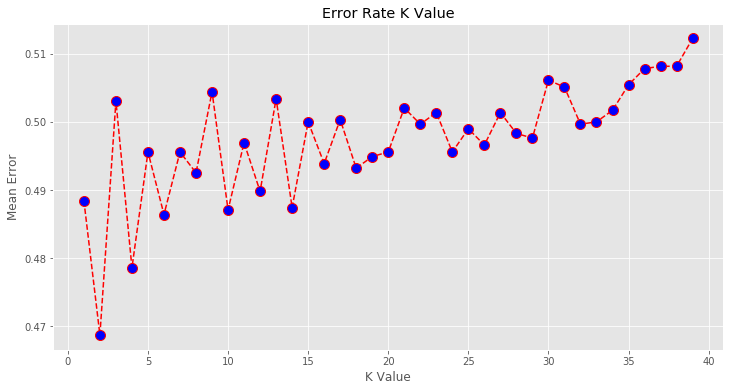

In [259]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

The above graph shows the Least Mean error is for the K-value 2. 

In [283]:
#Use the best parameters for our K-Nearest Neighbors

#OntimeKNNClassifierEst.fit(X_train_scaled, yTrain) # From Grid Search

bestScores = cross_validate(OntimeKNNClassifierEst,X_train_scaled, yTrain,scoring=['accuracy','precision','recall'], cv=cv_object, return_train_score=True)


# grab the results from the dictionary into a dataframe
cvScoreResult = pd.DataFrame()
cvScoreResult['Accuracy'] = bestScores['test_accuracy']
cvScoreResult['Precision'] = bestScores['test_precision']
cvScoreResult['Recall'] = bestScores['test_recall']
modelPrecTestResults['kNN'] = bestScores['test_precision']

print('Cross Validation Fold -- Mean Error Scores')
print(cvScoreResult)

avgAccuracy = bestScores['test_accuracy'].mean()
avgPrecision = bestScores['test_precision'].mean()
avgRecall = bestScores['test_recall'].mean()


avgAccStr = "\nAverage accuracy for all cv folds is: \t {avgAccuracy:.5}"
avgPrcStr = "Average precision for all cv folds is: \t {avgPrecision:.5}"
avgRecStr = "Average recall for all cv folds is: \t {avgRecall:.5}"

print(avgAccStr.format(avgAccuracy=avgAccuracy))
print(avgPrcStr.format(avgPrecision=avgPrecision))
print(avgRecStr.format(avgRecall=avgRecall))
print('*********************************************************')

Cross Validation Fold -- Mean Error Scores
   Accuracy  Precision    Recall
0  0.625159   0.615789  0.442344
1  0.607735   0.557895  0.419387
2  0.609860   0.570093  0.470135
3  0.621334   0.583829  0.475775
4  0.614535   0.597403  0.435194
5  0.631534   0.598214  0.459354
6  0.622184   0.598131  0.484390
7  0.615810   0.589552  0.385742
8  0.630259   0.600000  0.470930
9  0.602635   0.582031  0.421301

Average accuracy for all cv folds is: 	 0.6181
Average precision for all cv folds is: 	 0.58929
Average recall for all cv folds is: 	 0.44646
*********************************************************


<a id='OnTimeComp'></a>
### Model Comparison for Paramedics On-time Arraival
**[Return](#DocIndex)**

In [279]:
# This section can be use for the statistical analysis
modelPrecTestResults

,LinearRegression,TreeModel,kNN
0,0.690299,0.705882,0.615789
1,0.676157,0.732558,0.557895
2,0.689531,0.718310,0.570093
3,0.688645,0.753425,0.583829
4,0.703448,0.741176,0.597403
5,0.676375,0.790698,0.598214
6,0.715278,0.736842,0.598131
7,0.706485,0.724138,0.589552
8,0.714765,0.826667,0.600000
9,0.698039,0.696429,0.582031


In [280]:
modelPrecTestResults.describe()

,LinearRegression,TreeModel,kNN
count,10.000000,10.000000,10.000000
mean,0.695902,0.742612,0.589294
std,0.014144,0.039503,0.016591
min,0.676157,0.696429,0.557895
25%,0.688866,0.719767,0.582481
50%,0.694169,0.734700,0.593477
75%,0.705726,0.750363,0.598193
max,0.715278,0.826667,0.615789


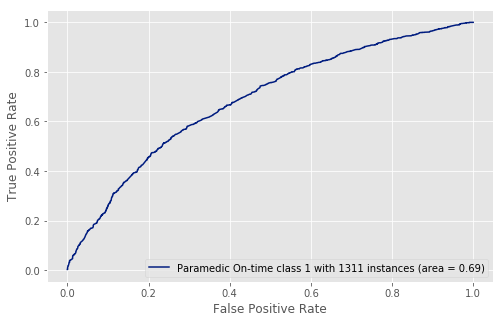

In [264]:
# ROC Code addapted from the notebook '06. Clasification.ipynb' 
#https://github.com/eclarson/DataMiningNotebooks/blob/master/06.%20Classification.ipynb
seaborn.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(yTest):
    fpr[i], tpr[i], _ = mt.roc_curve(yTest, y_hat_SearchGrid_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])
    

plt.figure(figsize=(8,5))
plt.plot(fpr[1], tpr[1], label='Paramedic On-time class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(1, sum(yTest==1), roc_auc[1]))

    
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Feature importance

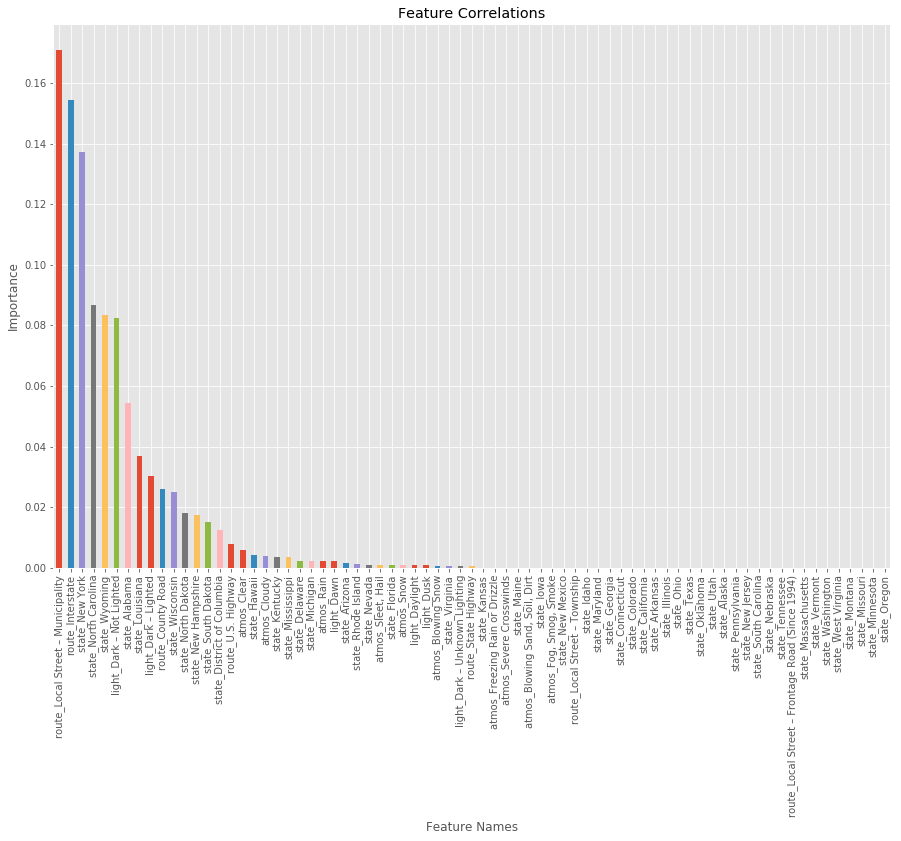

1.0


In [303]:
#chart by weight for the logistic regresion
import scipy.stats as st

featureImpDf.sort_values(by='Importance', inplace=True, ascending=False )
plt.style.use('ggplot')
Importance = pd.Series(featureImpDf['Importance'].values,index=featureImpDf['Attribute'])
ax = Importance.plot(kind='bar', figsize=(15,10))

ax.set_title("Feature Correlations")
ax.set_ylabel("Importance")
ax.set_xlabel("Feature Names")
plt.show()

#print(featureImpDf['Importance'].sum())

<a id='MultiFatality'></a>
## Multi-Fatality Accidents
**[Return](#DocIndex)**  

For our second task, we are interested in determining if there are factors that are more strongly related to multi-fatality crashes versus single-fatality crashes. This is a very relevant problem given our domain space: if emergency services could reasonably predict, based on some factors, if a given crash is going to have multiple fatalities, they could respond accordingly and perhaps be more able to prevent deaths in such incidents in the future. We will therefore investigate the data in several ways, in an attempt to answer the question of whether or not some factors are more likely to be associated with a multi-fatality accident over others.

#### Data preperation for Multiple Fatalities Model

We will create the Multiple_Fatalities classification to be the dependent variable for Model 2. This will be binary using ‘1’ to indicate that there is more than 1 fatality in the accident and ‘0’, if it is not a multiple fatality accident. 

In [ ]:
#creates the binary variable for clasificaiton 'Multiple_Fatalities'
Accident_df_2['Multiple_Fatalities'] = np.where(Accident_df_2['number_of_fatalities'] > 1,1,0)


Create a scatter matrix for damage variables and the dependent variable

In [ ]:
# This creates a data frame of only variables that we want to examine visually  
Accident_forScatter=Accident_df_2[['Multiple_Fatalities','Clock points','No Damage','Top','Undercarriage','Unknown']]

            
# Dislplays the data types of the variables
Accident_forScatter.dtypes

In [ ]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

ax = scatter_matrix(Accident_forScatter,figsize=(15, 10),diagonal='kde')
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 10,  rotation=0) for item in ax.ravel()]

#x labels
[plt.setp(item.xaxis.get_label(), 'size', 10, rotation=90) for item in ax.ravel()]

#need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.5,0.5) for s in ax.reshape(-1)]
;

Create a scatter matrix for distract variables and the dependent variable

In [ ]:
# This creates a data frame of only variables that we want to examine visually  
Accident_forScatter=Accident_df_2[['Multiple_Fatalities',
                                   'By a Moving Object in Vehicle',
                                   'By Other Occupant(s)',
                                   'Careless/Inattentive',
                                   'Distracted by Outside Person, Object or Event',
                                   'Distraction (Distracted), Details Unknown',
                                   'Distraction/Inattention','Eating or Drinking',
                                   'Inattention (Inattentive), Details Unknown',
                                   'Looked But Did Not See',
                                   'Lost In Thought/Day Dreaming',
                                   'No Driver Present/Unknown if Driver Present',
                                   'Not Distracted','Not Reported',
                                   'Other Cellular Phone Related',
                                   'Other Distraction',
                                   'Smoking Related',
                                   'Unknown if Distracted',
                                   'While Adjusting Audio or Climate Controls',
                                   'While Manipulating Cellular Phone',
                                   'While Talking or Listening to Cellular Phone',
                                   'While Using or Reaching For Device/Object Brought Into Vehicle',
                                   'While Using Other Component/Controls Integral to Vehicle']]

            
# Dislplays the data types of the variables
Accident_forScatter.dtypes

In [ ]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

ax = scatter_matrix(Accident_forScatter,figsize=(15, 10),diagonal='kde')
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 10,  rotation=0) for item in ax.ravel()]

#x labels
[plt.setp(item.xaxis.get_label(), 'size', 10, rotation=90) for item in ax.ravel()]

#need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.5,0.5) for s in ax.reshape(-1)]
;

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score


num_estimators = 50
# lets train some trees
clf_array = [
    ('Stump',              DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)),
    ('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(max_depth=50, n_estimators=num_estimators)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators=num_estimators,min_samples_split=2)),
    ('Boosted Tree',       GradientBoostingClassifier(n_estimators=num_estimators)), #takes a long time
    ]

for clf in clf_array:
    acc = cross_val_score(clf[1],X,y)
    print (clf[0], acc.mean())